# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#! pip install pandas

In [2]:
#! pip install matplotlib

In [3]:
import pandas as pd

#читаем данные, при первом запуске обнаружено что разделителем является '\t', добавлен параметр sep
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Увеличим число столбцов для отображения. Запомним первоначальный размер 


In [4]:
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df_old_shape = df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

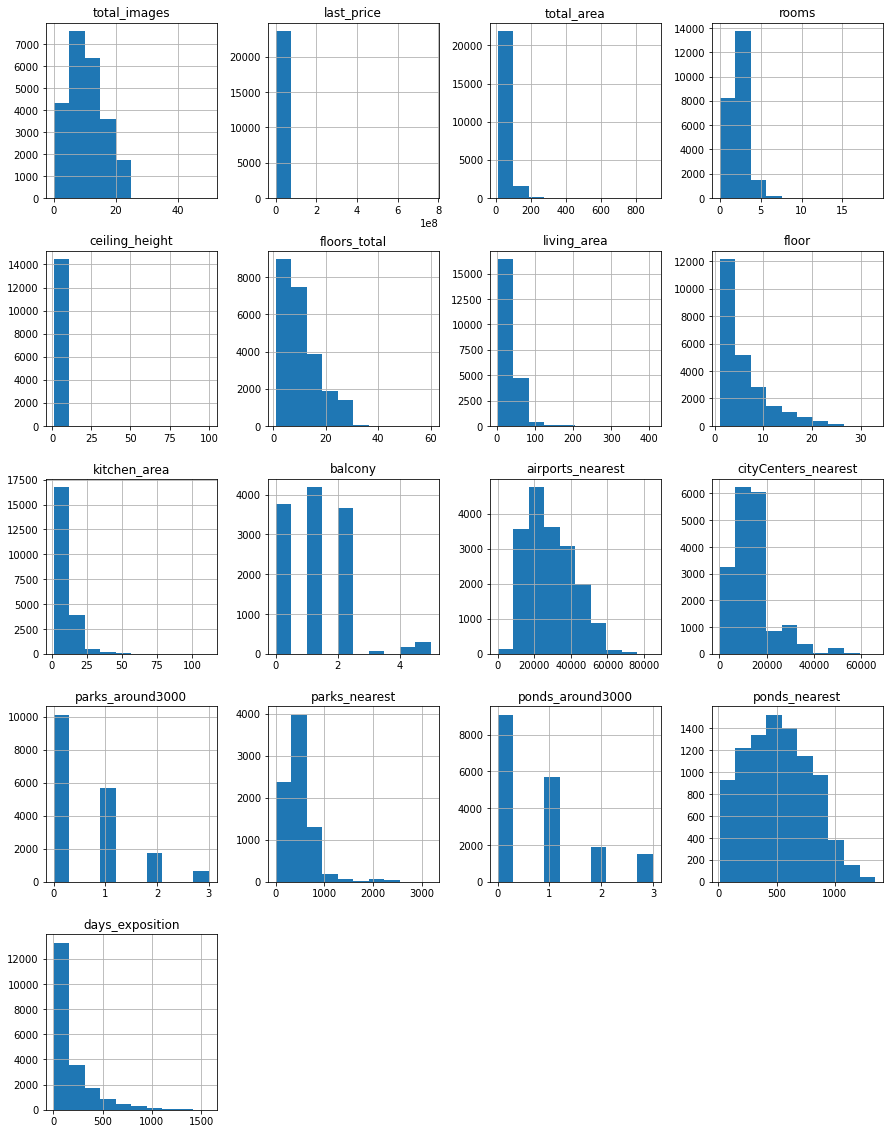

In [6]:
df.hist(figsize=(15,20));

При просмотре графиков видно, что для last_price— цена на момент снятия с публикации,total_area— общая площадь квартиры в квадратных метрах (м²),ceiling_height— высота потолков (м),kitchen_area— площадь кухни в квадратных метрах (м²), большинство значений находятся в диапазоне значительно меньшим, чем диапазон значений(они поместились в один столбик), что может говорить о аномальных значениях.
    Для ceiling_height— высота потолков (м) видно невозможные значения до 100м.


### Предобработка данных

#### Общая информация по столбцам
Согласно info() пропущенные значения есть в столбцах:  
 5   ceiling_height        14504 non-null  float64 высота потолков (м)  
 6   floors_total          23613 non-null  float64 всего этажей в доме  
 7   living_area           21796 non-null  float64 жилая площадь в квадратных метрах (м²)  
 9   is_apartment          2775 non-null   object  апартаменты (булев тип)  
 12  kitchen_area          21421 non-null  float64 площадь кухни в квадратных метрах (м²)  
 13  balcony               12180 non-null  float64 число балконов  
 14  locality_name         23650 non-null  object название населённого пункта  
 15  airports_nearest      18157 non-null  float64 расстояние до ближайшего аэропорта в метрах (м)  
 16  cityCenters_nearest   18180 non-null  float64 расстояние до центра города (м)  
 17  parks_around3000      18181 non-null  float64 число водоёмов в радиусе 3 км  
 18  parks_nearest         8079 non-null   float64 расстояние до ближайшего парка (м)  
 19  ponds_around3000      18181 non-null  float64 число водоёмов в радиусе 3 км  
 20  ponds_nearest         9110 non-null   float64 расстояние до ближайшего водоёма (м)  
 21  days_exposition       20518 non-null  float64 сколько дней было размещено объявление (от публикации до снятия)  


#### Заполним пропущенные значения для столбцов 'is_apartment', 'balcony'

In [7]:
#Если не указано, является ли аппартаментом, логично предположить, что объект аппартаментом не является
df['is_apartment'].fillna(False, inplace=True)

#Если не указано, количетсво балконов, логично предпроложить, что число балконов объекта = 0
#Также заменим тип с float на int
df['balcony'].fillna(0, inplace=True)
df['balcony']=df['balcony'].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Исследуем названия населенного пункта

In [8]:
#Заменим все незаполненные названия населенных пунктов на Неизвестный
df['locality_name'].fillna('Неизвестный', inplace=True)

In [9]:
#Выведем все уникальные названия поселков
print('Уникальных названий поселков:',len(df['locality_name'].unique()))
for i in df['locality_name'].unique():
    print(i)

Уникальных названий поселков: 365
Санкт-Петербург
посёлок Шушары
городской посёлок Янино-1
посёлок Парголово
посёлок Мурино
Ломоносов
Сертолово
Петергоф
Пушкин
деревня Кудрово
Коммунар
Колпино
поселок городского типа Красный Бор
Гатчина
поселок Мурино
деревня Фёдоровское
Выборг
Кронштадт
Кировск
деревня Новое Девяткино
посёлок Металлострой
посёлок городского типа Лебяжье
посёлок городского типа Сиверский
поселок Молодцово
поселок городского типа Кузьмоловский
садовое товарищество Новая Ропша
Павловск
деревня Пикколово
Всеволожск
Волхов
Кингисепп
Приозерск
Сестрорецк
деревня Куттузи
посёлок Аннино
поселок городского типа Ефимовский
посёлок Плодовое
деревня Заклинье
поселок Торковичи
поселок Первомайское
Красное Село
посёлок Понтонный
Сясьстрой
деревня Старая
деревня Лесколово
посёлок Новый Свет
Сланцы
село Путилово
Ивангород
Мурино
Шлиссельбург
Никольское
Зеленогорск
Сосновый Бор
поселок Новый Свет
деревня Оржицы
деревня Кальтино
Кудрово
поселок Романовка
посёлок Бугры
поселок Бугры
пос

In [10]:
#Их слишком много, попробуем выделить только типы
set(map(lambda x: (x[0:x.rfind(' ')]), df[df['locality_name'].str.rfind(' ')!=-1]['locality_name']))

{'Красное',
 'Лодейное',
 'Новая',
 'Сосновый',
 'городской поселок',
 'городской поселок Большая',
 'городской посёлок',
 'деревня',
 'деревня Большая',
 'деревня Большие',
 'деревня Большое',
 'деревня Большой',
 'деревня Борисова',
 'деревня Вахнова',
 'деревня Малая',
 'деревня Малое',
 'деревня Малые',
 'деревня Нижние',
 'деревня Новое',
 'деревня Старая',
 'деревня Старое',
 'деревня Старые',
 'деревня Трубников',
 'деревня Чудской',
 'коттеджный поселок',
 'коттеджный поселок Кивеннапа',
 'коттеджный посёлок',
 'поселок',
 'поселок Красная',
 'поселок Лисий',
 'поселок Новый',
 'поселок Пансионат Зелёный',
 'поселок Старая',
 'поселок городского типа',
 'поселок городского типа Большая',
 'поселок городского типа Дружная',
 'поселок городского типа Красный',
 'поселок городского типа имени',
 'поселок станции',
 'посёлок',
 'посёлок Лисий',
 'посёлок Новый',
 'посёлок Пансионат Зелёный',
 'посёлок Платформа 69-й',
 'посёлок Старая',
 'посёлок Форт Красная',
 'посёлок городского

In [11]:
#Для идентичности заменим 'посёлок' на 'поселок'
df['locality_name'] = df['locality_name'].str.replace('посёлок','поселок')
set(map(lambda x: (x[0:x.rfind(' ')]), df[df['locality_name'].str.rfind(' ')!=-1]['locality_name']))

{'Красное',
 'Лодейное',
 'Новая',
 'Сосновый',
 'городской поселок',
 'городской поселок Большая',
 'деревня',
 'деревня Большая',
 'деревня Большие',
 'деревня Большое',
 'деревня Большой',
 'деревня Борисова',
 'деревня Вахнова',
 'деревня Малая',
 'деревня Малое',
 'деревня Малые',
 'деревня Нижние',
 'деревня Новое',
 'деревня Старая',
 'деревня Старое',
 'деревня Старые',
 'деревня Трубников',
 'деревня Чудской',
 'коттеджный поселок',
 'коттеджный поселок Кивеннапа',
 'поселок',
 'поселок Красная',
 'поселок Лисий',
 'поселок Новый',
 'поселок Пансионат Зелёный',
 'поселок Платформа 69-й',
 'поселок Старая',
 'поселок Форт Красная',
 'поселок городского типа',
 'поселок городского типа Большая',
 'поселок городского типа Дружная',
 'поселок городского типа Красный',
 'поселок городского типа имени',
 'поселок при железнодорожной станции',
 'поселок станции',
 'садоводческое некоммерческое товарищество Лесная',
 'садовое товарищество',
 'садовое товарищество Новая',
 'село',
 'се

In [12]:
#на данном этапе имеем следующие типы поселений
type_city =('городской поселок','деревня','коттеджный поселок','поселок городского типа',
               'поселок при железнодорожной станции','садоводческое некоммерческое товарищество',
               'садовое товарищество','поселок','село')

In [13]:
#с помощью сервиса https://kladr-api.ru проверим правильность типов поселений
def type_and_name_city(text):
    for i in type_city:
        if text.find(i) != -1:
            return i, text[len(i)+1:]
    return 'город', text
        
import requests

def check_type_and_name_city(text):
    type_city, name_city = type_and_name_city(text)
    URL = f'https://kladr-api.ru/api.php?query={name_city}&regionId=4700000000000&contentType=city&withParent=1'
    response = requests.get(URL).json()
    name_city_list = []
    type_city_list = []
    for i in response['result']:
        if i['id'] != 'Free':
            name_city_list.append(i['name'])
            type_city_list.append(i['type'].lower())   
    if name_city not in name_city_list:
        print(f'{type_city}  {name_city} не найден, предлагаем:',
              [type_city_list[i] + ' ' + name_city_list[i] for i in range(len(type_city_list))])
    else:
        type_city_list_filter = [type_city_list[i] for i in range(len(type_city_list)) if name_city_list[i] == name_city]
        if type_city not in  type_city_list_filter:
            print(f'{type_city} для {name_city} не найден, предлагаем:',
              type_city_list_filter)
        

In [14]:
print('Уникальных названий поселков:',len(df['locality_name'].unique()))
a = df['locality_name'].unique()
for i in a:
    check_type_and_name_city(i)

Уникальных названий поселков: 331
поселок для Мурино не найден, предлагаем: ['город']
деревня для Кудрово не найден, предлагаем: ['город']
поселок городского типа для Красный Бор не найден, предлагаем: ['деревня', 'деревня', 'деревня', 'деревня', 'городской поселок']
деревня для Фёдоровское не найден, предлагаем: ['городской поселок']
поселок городского типа для Лебяжье не найден, предлагаем: ['поселок', 'городской поселок']
поселок городского типа для Сиверский не найден, предлагаем: ['городской поселок']
поселок городского типа для Кузьмоловский не найден, предлагаем: ['городской поселок', 'массив']
садовое товарищество  Новая Ропша не найден, предлагаем: []
поселок городского типа для Ефимовский не найден, предлагаем: ['городской поселок']
деревня  Заклинье не найден, предлагаем: ['деревня Заклинье (Волошовское с/п)', 'деревня Заклинье (Заклинское с/п)']
поселок городского типа для Рощино не найден, предлагаем: ['городской поселок']
поселок  Молодёжное не найден, предлагаем: ['посел

In [15]:
# Мурино, Кудрово - это город
# поселок городского типа и городской поселок для Ленинградской области Согласно Закону от 15 июня 2010 года 
#№ 32-оз «Об административно-территориальном устройстве Ленинградской области и порядке его изменения» одно и то же
#заменим в названиях ё на е
df['locality_name'] = df['locality_name'].str.replace('поселок Мурино','Мурино')
df['locality_name'] = df['locality_name'].str.replace('деревня Кудрово','Кудрово')
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа','городской поселок')
#на данном этапе имеем следующие типы поселений
type_city =('городской поселок','деревня','коттеджный поселок',
               'поселок при железнодорожной станции','садоводческое некоммерческое товарищество',
               'садовое товарищество','поселок','село')

In [16]:
#Запустим повторно проверку
print('Уникальных названий поселков:',len(df['locality_name'].unique()))
a = df['locality_name'].unique()
for i in a:
    check_type_and_name_city(i)

Уникальных названий поселков: 322
деревня для Фёдоровское не найден, предлагаем: ['городской поселок']
садовое товарищество  Новая Ропша не найден, предлагаем: []
деревня  Заклинье не найден, предлагаем: ['деревня Заклинье (Волошовское с/п)', 'деревня Заклинье (Заклинское с/п)']
поселок  Молодёжное не найден, предлагаем: ['поселок Молодежное', 'дачный поселок СНТ Молодежное', 'садовое неком-е товарищество Соловьевка п Молодежное', 'территория снт Молодежное']
город  Пикалёво не найден, предлагаем: ['город Пикалево']
город  Неизвестный не найден, предлагаем: []
поселок  станции Корнево не найден, предлагаем: []
поселок  Ильичёво не найден, предлагаем: ['поселок Ильичево']
поселок  станции Вещево не найден, предлагаем: []
садовое товарищество для Рахья не найден, предлагаем: ['массив', 'городской поселок']
поселок  Сапёрный не найден, предлагаем: ['поселок Саперный']
поселок  станции Приветнинское не найден, предлагаем: []
поселок  Цвылёво не найден, предлагаем: ['поселок Цвылево', 'посе

In [17]:
#заменим найденные несоответствия
df['locality_name'] = df['locality_name'].str.replace('деревня Фёдоровское','городской поселок Фёдоровское')
df['locality_name'] = df['locality_name'].str.replace('поселок Молодёжное','поселок Молодежное')
df['locality_name'] = df['locality_name'].str.replace('Пикалёво','Пикалево')
df['locality_name'] = df['locality_name'].str.replace('поселок Ильичёво','поселок Ильичево')
df['locality_name'] = df['locality_name'].str.replace('поселок Сапёрный','поселок Саперный')
df['locality_name'] = df['locality_name'].str.replace('поселок Цвылёво','поселок Цвылево')
df['locality_name'] = df['locality_name'].str.replace('поселок Селезнёво','поселок Селезнево')
df['locality_name'] = df['locality_name'].str.replace('поселок Почап','деревня Почап')
df['locality_name'] = df['locality_name'].str.replace('поселок Сапёрное','поселок Саперное')
df['locality_name'] = df['locality_name'].str.replace('поселок Форт Красная Горка','поселок Форт-Красная Горка')
df['locality_name'] = df['locality_name'].str.replace('городской поселок Кондратьево','поселок')
df['locality_name'] = df['locality_name'].str.replace('деревня Снегирёвка','деревня Снегиревка')
print('Уникальных названий поселков:',len(df['locality_name'].unique()))

Уникальных названий поселков: 321


Сократили число уникальных названий с 365 до 321

#### Заполним пропущенные значения числа этажей в доме

In [18]:
#Этаж указан везде, а общее количество этажей имеет пропуски.
df[(df['floors_total'].isna())][['floor','locality_name']]


,floor,locality_name
186,4,Санкт-Петербург
237,1,Санкт-Петербург
457,12,Санкт-Петербург
671,8,Санкт-Петербург
1757,9,Санкт-Петербург
...,...,...
22542,3,Санкт-Петербург
22656,20,Санкт-Петербург
22808,6,Санкт-Петербург
23590,18,Санкт-Петербург


In [19]:
import numpy as np

#df['floors_total'].fillna(df.groupby(['floor','locality_name'])['floors_total'].median().apply(np.ceil),inplace=True)
df['floors_total'].isna().sum()

86

In [20]:
#Подставим в незаполненные значения медианные значения округленное вверх для объектов сгруппированных по этажу и населенному пункту
df1 = df.copy() #Чтобы постоянно не запускать блокнот при расчетах используем промежуточный dataframe
df1['floors_total'].fillna(df1.groupby(['floor','locality_name'])['floors_total'].transform('median').apply(np.ceil),inplace=True)
# Проверим, что этаж объекта не превышает максимальный этаж
print(df1[df1['floor'] > df1['floors_total']].count())
df1[df1['floor'] > df1['floors_total']]['floors_total'] =  df1['floor']
df1['floors_total'].isna().sum()
df1['floors_total'].unique()
df1[(df1['floors_total'].isna())][['floor','locality_name']]

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


,floor,locality_name
20146,15,поселок Стрельна


In [21]:
#Осталось одно нулевое значение для поселок Стрельна и объекта на 15м этаже
print(df1[df1['locality_name'] == 'поселок Стрельна' ].count())

total_images            44
last_price              44
total_area              44
first_day_exposition    44
rooms                   44
ceiling_height          26
floors_total            43
living_area             44
floor                   44
is_apartment            44
studio                  44
open_plan               44
kitchen_area            44
balcony                 44
locality_name           44
airports_nearest        44
cityCenters_nearest     44
parks_around3000        44
parks_nearest           19
ponds_around3000        44
ponds_nearest           24
days_exposition         38
dtype: int64


In [22]:
#Получим медианное и максимальное значение для общего количества этажей в поселок Стрельна
print(df1[df1['locality_name'] == 'поселок Стрельна']['floors_total'].median())
print(df1[df1['locality_name'] == 'поселок Стрельна']['floors_total'].max())

5.0
15.0


In [23]:
#Заменим нулевое значение на 15 и заменим тип данных на int
df1['floors_total'].fillna(15,inplace=True)
df1['floors_total']=df1['floors_total'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [24]:
df=df1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

#### Заполним пропущенные значения площади объектов

In [25]:
#Посмотрим информацию по жилой площади
df1 = df.copy()
print(df1['living_area'].unique())
print(len(df1['living_area'].unique()))
print(df1['living_area'].isna().sum())

[51.   18.6  34.3  ... 31.65 13.59 42.55]
1783
1903


In [26]:
#Заполним жилую площадь исходя из медианного значения объединенного для населенных пунктов и количества комнат
df1['living_area'].fillna(df1.groupby(['rooms','locality_name'])['living_area'].transform('median'),inplace=True)
print(df1['living_area'].isna().sum())

52


In [27]:
df1[df1['living_area'].isna()][['rooms','locality_name']]

,rooms,locality_name
164,2,городской поселок Ефимовский
986,3,поселок Севастьяново
1451,1,деревня Иссад
1985,1,село Паша
2409,0,поселок Петро-Славянка
2462,7,поселок Парголово
3147,0,Тосно
3334,2,деревня Пчева
4307,3,деревня Агалатово
4570,2,поселок Победа


In [28]:
#Осталось незаполненно 52 значений, все объекты расположены в области
#Заполним медианными значениями в зависимости от количества комнат для объектов в области
df1['living_area'].fillna(df1[df1['locality_name'] != 'Санкт-Петербург'].groupby(['rooms'])['living_area'].transform('median'),inplace=True)
print(df1['living_area'].isna().sum())

0


In [29]:
#Посмотрим информацию по площади кухни
print(df1['kitchen_area'].unique())
print(len(df1['kitchen_area'].unique()))
print(df1['kitchen_area'].isna().sum())

[ 25.    11.     8.3     nan  41.     9.1   14.4   18.9    8.81   6.5
   8.5    6.     9.     5.2    8.     7.6    5.6   12.     5.7    6.1
  19.6   15.     7.     9.2   11.7   13.4   17.     6.3   11.6    8.8
  10.    17.6    7.5    9.5   50.    15.5   10.7   11.1   20.    11.9
  16.     5.3   11.5    7.2    6.2   10.4    7.1    4.9    7.3   11.95
  10.2    6.4    5.5   13.     8.4   23.6   10.8   18.3    5.     8.2
  24.    23.8    6.6   26.85  15.4    7.8   33.8    5.4   12.72  12.2
  19.    12.4    7.9   10.3    9.8   17.5   14.7   20.91  21.3   10.6
  10.9    9.7    7.7   12.5   11.4    8.6   11.24  14.1   15.7   13.29
  14.    12.9   12.7   16.5    9.36  21.5   35.    10.5    8.7   19.3
  21.4   40.    49.2   11.52   8.9    9.6   30.    14.2    8.1   10.44
   4.5   16.3   11.2   18.4    7.4   11.3    9.4   13.1   10.19   7.06
  22.    36.     5.1   18.7    9.9   14.3   18.    23.    19.4   11.8
  13.3   17.7   23.1   10.63  21.1   11.33  13.5   19.5   13.2   17.2
  77.    13.8   

In [30]:
#Заполним площадь кухни исходя из медианного значения объединенного для населенных пунктов и количества комнат
df1['kitchen_area'].fillna(df1.groupby(['rooms','locality_name'])['kitchen_area'].transform('median'),inplace=True)
print(df1['kitchen_area'].isna().sum())

244


In [31]:
df1[(df1['kitchen_area'].isna())][['rooms','locality_name']]

,rooms,locality_name
144,0,Мурино
164,2,городской поселок Ефимовский
349,0,Кудрово
440,0,Санкт-Петербург
508,0,поселок Парголово
...,...,...
23210,0,Санкт-Петербург
23442,0,Мурино
23554,0,Санкт-Петербург
23592,0,Никольское


In [32]:
#посмотрим сколько из них студий
print(len(df1[(df1['kitchen_area'].isna()) & (df1['studio']==1)][['rooms','locality_name']]))
df1[(df1['studio']==1)].agg({'kitchen_area':['min','max','median']})

138


,kitchen_area
min,8.0
max,11.0
median,9.4


In [33]:
df1[(df1['studio']==0)].agg({'kitchen_area':['min','max','median']})

,kitchen_area
min,1.3
max,112.0
median,9.3


In [34]:
#Т.к. медианное значение для студий и не студий примерно равно укажем площадь кухни 9.4
df1['kitchen_area'].fillna(9.4,inplace=True)
print(df1['kitchen_area'].isna().sum())

0


In [35]:
df=df1

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

#### Заполним пропущенные значения высоты потолков

In [37]:
df1 = df.copy()
df1['ceiling_height'].isna().sum()

9195

In [38]:
#Заполним высоту потолков исходя из медианного значения объединенного для населенных пунктов и этажа
df1['ceiling_height'].fillna(df1.groupby(['floor','locality_name'])['ceiling_height'].transform('median'),inplace=True)
print(df1['ceiling_height'].isna().sum())

417


In [39]:
#Заполним медианными значениями в зависимости от высоты потолков для объектов в области
df1['ceiling_height'].fillna(df1[df1['locality_name'] != 'Санкт-Петербург'].groupby(['floor'])['ceiling_height'].transform('median'),inplace=True)
print(df1['ceiling_height'].isna().sum())

4


In [40]:
#Оставшиеся заполним медианными значениями для Санкт-Петербурга
df1['ceiling_height'].fillna((df1[df1['locality_name'] == 'Санкт-Петербург']['ceiling_height'].median()),inplace=True)
print(df1['ceiling_height'].isna().sum())

0


In [41]:
df = df1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

#### Рассмотрим аномальные значения

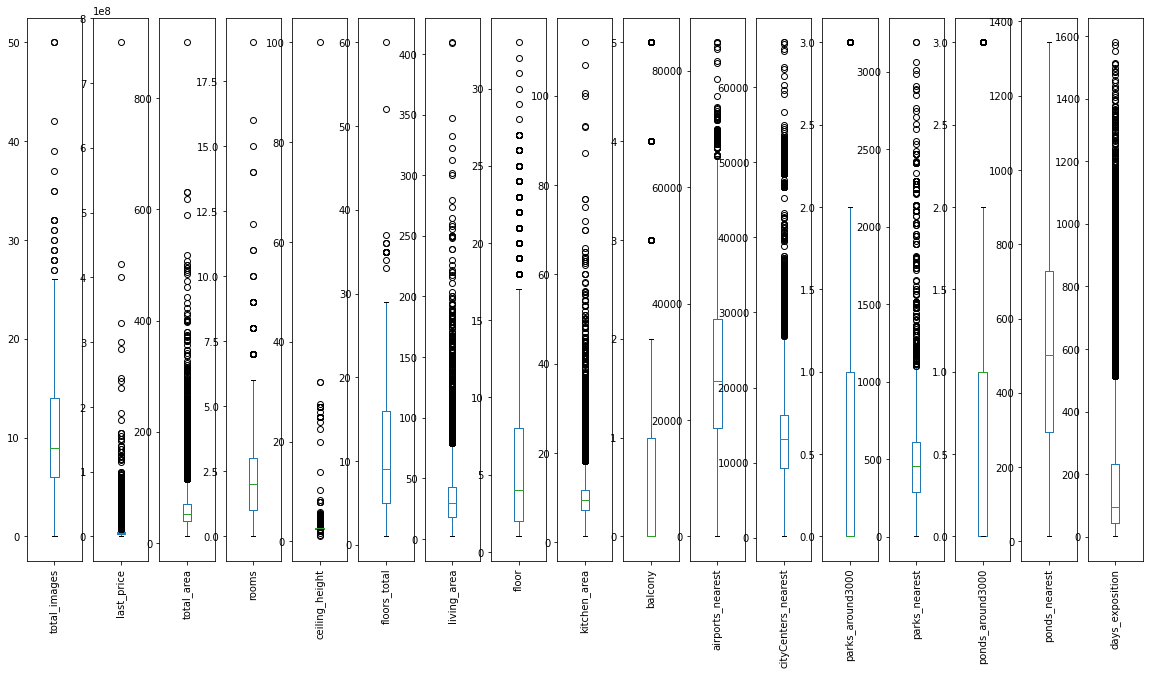

In [42]:
#Построим boxplot значений
df.plot(kind='box',figsize=(20,10),subplots=True,rot = 90);

In [43]:
#Многие значения имеют выбросы. Исследуем следующие:
# ceiling_height — высота потолков (м)
# площади - total_area, living_area, kitchen_area 
# floors_total — всего этажей в доме
df1=df.copy()
df1['ceiling_height'].quantile([.01,.1,.25,.5,.75,.9,.99])

0.01    2.50
0.10    2.50
0.25    2.56
0.50    2.65
0.75    2.73
0.90    3.00
0.99    3.60
Name: ceiling_height, dtype: float64

In [44]:
df1[df1['ceiling_height']<2.3]['ceiling_height']

552      2.00
2572     2.00
4212     2.00
5712     1.20
5850     2.00
10285    2.00
11352    2.00
12755    2.20
16446    2.00
16884    2.00
16934    1.75
17794    2.25
19098    2.00
19329    2.00
20520    2.00
22590    1.00
22960    2.00
Name: ceiling_height, dtype: float64

In [45]:
df1[df1['ceiling_height']>10]['ceiling_height']

355       25.0
3148      32.0
4643      25.0
4876      27.0
5076      24.0
5246      27.0
5669      26.0
5807      27.0
6246      25.0
9379      25.0
10773     27.0
11285     25.0
14382     25.0
15061     14.0
17496     20.0
17857     27.0
18545     25.0
20478     27.0
20507     22.6
21377     27.5
21824     27.0
22309     10.3
22336     32.0
22869    100.0
22938     27.0
Name: ceiling_height, dtype: float64

In [46]:
df1[df1['ceiling_height']==14] #Данное значение впоследствии удалим из исходного dataframe

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14,32.4,5,False,False,False,9.1,2,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0


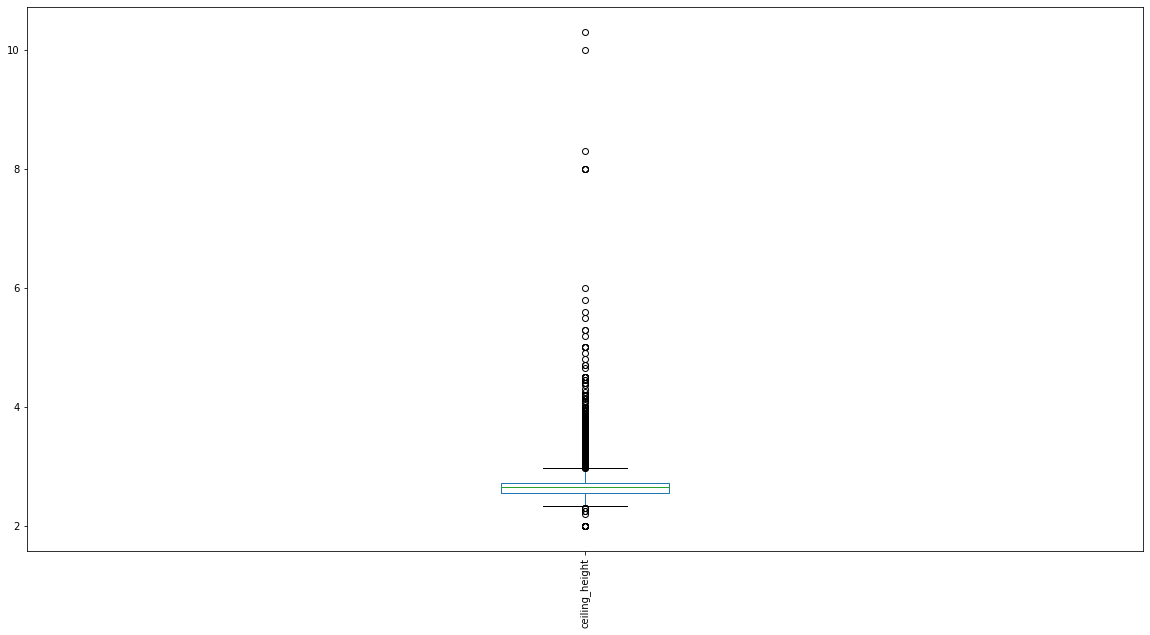

In [47]:
#Для высоты потолков больше 20 разделим их на 10
df1.loc[(df1['ceiling_height']>20),'ceiling_height'] /= 10
#Удалим записи с высотой потолков меньше 2 и больше 13
df1 = df1[(df1['ceiling_height']>=2) & (df1['ceiling_height']<13)]
df1['ceiling_height'].plot(kind='box',figsize=(20,10),subplots=True,rot = 90);

In [48]:
#Рассмотрим общую площадь
df1['total_area'].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99])

count    23694.000000
mean        60.349269
std         35.656764
min         12.000000
1%          25.196500
10%         33.000000
25%         40.000000
50%         52.000000
75%         69.900000
90%         93.570000
99%        197.249000
max        900.000000
Name: total_area, dtype: float64

In [49]:
df1[df1['total_area']>100][['last_price','total_area','locality_name']].sort_values('last_price')

,last_price,total_area,locality_name
8793,12190.0,109.0,Санкт-Петербург
23477,1450000.0,138.0,Гатчина
4659,1650000.0,115.0,Сланцы
17753,1800000.0,117.3,Санкт-Петербург
19952,2200000.0,138.7,Санкт-Петербург
...,...,...,...
15651,300000000.0,618.0,Санкт-Петербург
1436,330000000.0,190.0,Санкт-Петербург
14706,401300000.0,401.0,Санкт-Петербург
19540,420000000.0,900.0,Санкт-Петербург


Некоторые цены выглядят неадекватно указанной площади, рассмотреть можно будет испльзуя объединненый параметр цена за кв.м

In [50]:
print(df1['living_area'].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]))
print(df1['kitchen_area'].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]))

count    23694.000000
mean        34.325269
std         21.734549
min          2.000000
1%          13.000000
10%         16.500000
25%         18.400000
50%         30.000000
75%         42.500000
90%         54.500000
99%        118.528000
max        409.700000
Name: living_area, dtype: float64
count    23694.000000
mean        10.466678
std          5.652872
min          1.300000
1%           5.000000
10%          6.000000
25%          7.200000
50%          9.400000
75%         11.600000
90%         15.300000
99%         35.000000
max        112.000000
Name: kitchen_area, dtype: float64


In [51]:
df1[df1['living_area']<10][['living_area','last_price','total_area','locality_name']].sort_values('last_price')

,living_area,last_price,total_area,locality_name
21758,2.0,2330000.0,23.00,Мурино
17582,5.0,2680000.0,22.00,Санкт-Петербург
4542,9.0,3300000.0,18.00,Санкт-Петербург
22252,9.0,3340000.0,37.40,Санкт-Петербург
7312,9.0,3400000.0,27.00,Санкт-Петербург
22473,9.1,3490304.0,33.26,Санкт-Петербург
16431,6.0,3799000.0,31.00,Санкт-Петербург
114,8.3,4000000.0,21.40,Санкт-Петербург
19251,6.5,4050000.0,33.00,Санкт-Петербург
21505,8.5,4100000.0,35.30,Санкт-Петербург


In [52]:
#Записи с жилой площадью меньше 10 удалим, не соотносятся с общей пощадью объектов
df1 = df1.loc[df1['living_area']>=10]
df1[df1['living_area']>118][['living_area','last_price','total_area','locality_name']].sort_values('last_price')

,living_area,last_price,total_area,locality_name
2462,239.4,7900000.0,201.5,поселок Парголово
10190,127.0,11700000.0,182.0,Санкт-Петербург
22038,160.0,11940000.0,206.0,Санкт-Петербург
18164,128.0,12160000.0,146.8,Санкт-Петербург
2489,153.9,12500000.0,255.0,Санкт-Петербург
...,...,...,...,...
16461,182.8,245000000.0,285.7,Санкт-Петербург
15651,258.0,300000000.0,618.0,Санкт-Петербург
14706,204.0,401300000.0,401.0,Санкт-Петербург
19540,409.7,420000000.0,900.0,Санкт-Петербург


Виден как минимум 1н объект где жилая площадь больше итоговой, позже сделаем проверка на соответсвие сумм площадей.
Некоторые цены выглядят неадекватно указанной площади, рассмотреть можно будет испльзуя объединненый параметр цена за кв.м

In [53]:
#рассмотрим площадь кухни
df1[df1['kitchen_area']<4][['kitchen_area','living_area','last_price','total_area','locality_name']].sort_values('last_price')

,kitchen_area,living_area,last_price,total_area,locality_name
6084,3.00,13.0,770000.0,18.00,Тихвин
19642,2.00,11.0,1190000.0,14.00,Санкт-Петербург
23498,3.50,33.0,1600000.0,54.00,Высоцк
21419,2.00,14.0,1870000.0,20.00,Санкт-Петербург
10208,3.00,13.0,1900000.0,17.00,Санкт-Петербург
8729,2.40,14.0,2200000.0,18.40,Пушкин
11475,3.80,26.8,2500000.0,40.80,деревня Яльгелево
906,2.00,18.0,2600000.0,27.00,Санкт-Петербург
3195,3.80,16.2,2690000.0,25.60,Санкт-Петербург
17424,3.00,17.4,2700000.0,26.69,Санкт-Петербург


In [54]:
df1[df1['kitchen_area']>60][['kitchen_area','living_area','last_price','total_area','locality_name']].sort_values('last_price')

,kitchen_area,living_area,last_price,total_area,locality_name
19499,64.0,36.0,8000000.0,118.0,Пушкин
2489,100.7,153.9,12500000.0,255.0,Санкт-Петербург
15780,64.0,36.4,12990000.0,119.6,Пушкин
18447,65.0,120.0,21800000.0,187.0,Санкт-Петербург
6193,70.0,90.0,24300000.0,230.0,Санкт-Петербург
22980,65.0,72.0,24500000.0,155.4,Санкт-Петербург
14900,62.5,42.7,25900000.0,125.6,Пушкин
19130,63.0,45.2,40000000.0,153.0,Санкт-Петербург
14644,75.0,58.0,47000000.0,150.0,Санкт-Петербург
13139,62.0,100.7,55000000.0,288.0,Санкт-Петербург


Некоторые площади выглядят аномольно, но я не вижу по какому признаку их можно удалить

In [55]:
#Проверим общую площадь к сумме площадей
df1[(df1['kitchen_area'] + df1['living_area'] > df1['total_area'])][['kitchen_area','living_area','last_price','total_area','locality_name']].sort_values('last_price')

,kitchen_area,living_area,last_price,total_area,locality_name
16219,9.4,30.00,450000.0,38.5,деревня Вахнова Кара
7962,8.5,45.50,550000.0,46.2,Луга
5855,9.4,12.70,945750.0,19.5,городской поселок Дубровка
18098,10.0,17.05,965780.0,22.5,Всеволожск
10964,10.0,16.00,1150000.0,20.0,Всеволожск
...,...,...,...,...,...
8211,14.5,82.00,13000000.0,93.0,Санкт-Петербург
20256,19.5,101.00,13351000.0,102.7,Санкт-Петербург
13134,16.0,95.00,13400000.0,107.0,Санкт-Петербург
14603,20.0,145.00,13490000.0,100.6,Санкт-Петербург


In [56]:
#Удалим аномальные значения
df1= df1.loc[(df1['kitchen_area'] + df1['living_area'] <= df1['total_area'])]

In [57]:
#рассмотрим общее количество этажей
df1[df1['floors_total']>30][['floor','floors_total','living_area','last_price','total_area','locality_name']].sort_values('floors_total')

,floor,floors_total,living_area,last_price,total_area,locality_name
11575,32,33,53.0,9900000.0,101.0,Санкт-Петербург
1697,23,34,18.0,3550000.0,28.0,Санкт-Петербург
22946,8,35,40.0,7690000.0,75.0,Санкт-Петербург
18629,31,35,21.0,5700000.0,54.0,Санкт-Петербург
15982,9,35,34.0,5900000.0,62.0,Санкт-Петербург
14347,26,35,27.4,8595000.0,69.7,Санкт-Петербург
13975,23,35,32.1,6990000.0,65.0,Санкт-Петербург
12960,13,35,26.6,6140000.0,54.0,Санкт-Петербург
12888,27,35,36.5,7600000.0,70.0,Санкт-Петербург
21809,11,35,39.0,10600000.0,77.0,Санкт-Петербург


In [58]:
#Значение 60 для Кронштадта - аномально, скорее всего должно быть 6. Удалим данное значение.
df1= df1.loc[df1['floors_total'] < 58]

Для заполнения пропусков в: расстояние до центра города (м), расстояние до ближайшего аэропорта в метрах (м), расстояние до ближайшего парка (м), число парков в радиусе 3 км, расстояние до ближайшего водоёма (м) из-за того что Санкт-Петербург большой город не хватает уточнения как минимум по району расположения объекта.

In [59]:
df=df1
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23244 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23244 non-null  int64  
 1   last_price            23244 non-null  float64
 2   total_area            23244 non-null  float64
 3   first_day_exposition  23244 non-null  object 
 4   rooms                 23244 non-null  int64  
 5   ceiling_height        23244 non-null  float64
 6   floors_total          23244 non-null  int64  
 7   living_area           23244 non-null  float64
 8   floor                 23244 non-null  int64  
 9   is_apartment          23244 non-null  bool   
 10  studio                23244 non-null  bool   
 11  open_plan             23244 non-null  bool   
 12  kitchen_area          23244 non-null  float64
 13  balcony               23244 non-null  int64  
 14  locality_name         23244 non-null  object 
 15  airports_nearest   

Рассмотрим аномальные значения стоимости квартир

In [60]:
df1 = df.copy()
print(df1['last_price'].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]))
pd.set_option('display.max_rows', None)
df1[df1['last_price']>37_000_000][['last_price','total_area','locality_name']].sort_values('last_price')

count    2.324400e+04
mean     6.590474e+06
std      1.093440e+07
min      1.219000e+04
1%       1.000000e+06
10%      2.500000e+06
25%      3.470000e+06
50%      4.682500e+06
75%      6.800000e+06
90%      1.100000e+07
99%      3.628582e+07
max      7.630000e+08
Name: last_price, dtype: float64


,last_price,total_area,locality_name
5259,37199888.0,186.70,Санкт-Петербург
3527,37272000.0,100.60,Санкт-Петербург
2469,37500000.0,240.00,Санкт-Петербург
262,37500000.0,158.00,Санкт-Петербург
15785,37800000.0,222.00,Санкт-Петербург
9783,37900000.0,220.00,Санкт-Петербург
11176,37998000.0,160.00,Санкт-Петербург
17011,37999000.0,207.00,Санкт-Петербург
5873,38000000.0,400.00,Санкт-Петербург
16247,38000000.0,109.00,Санкт-Петербург


In [61]:
df1[df1['last_price']<1_000_000][['last_price','total_area','locality_name']].sort_values('last_price')

,last_price,total_area,locality_name
8793,12190.0,109.00,Санкт-Петербург
17456,430000.0,30.40,Сланцы
14911,430000.0,54.00,поселок станции Свирь
16274,440000.0,40.00,деревня Старополье
5698,450000.0,42.00,городской поселок Будогощь
17676,450000.0,36.50,деревня Ям-Тесово
9581,450000.0,43.40,деревня Старополье
18867,470000.0,41.00,деревня Выскатка
21912,470000.0,37.00,поселок Совхозный
23484,470000.0,44.50,Сланцы


In [62]:
#Видно 1н объект с аномально низкой ценой, удалим его. Причин исключать объекты с высокой стоимостью не увидел.
df1 = df1[df1['last_price'] > 400_000]

Рассмотрим аномальные значения площадей квартир

In [63]:
print(df1['total_area'].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]))
df1[df1['total_area']>200][['last_price','total_area','locality_name']].sort_values('total_area')

count    23243.000000
mean        60.836351
std         35.702015
min         14.000000
1%          28.900000
10%         33.300000
25%         40.500000
50%         52.300000
75%         70.000000
90%         94.000000
99%        198.000000
max        900.000000
Name: total_area, dtype: float64


,last_price,total_area,locality_name
1706,62171920.0,200.30,Санкт-Петербург
5644,27500000.0,201.00,Санкт-Петербург
1766,53800000.0,201.00,Санкт-Петербург
9479,19000000.0,201.00,Санкт-Петербург
1187,25000000.0,201.00,Санкт-Петербург
2318,17900000.0,201.90,Санкт-Петербург
5451,16800000.0,202.00,Санкт-Петербург
13736,14990000.0,203.00,Санкт-Петербург
8559,48000000.0,203.30,Санкт-Петербург
7915,17800000.0,204.00,поселок Стрельна


Несколько объектов выглядят аномальными из сотношений площади и цены. Но решение об их удалении можно принять только если рассмотреть интегральный показатель цены кв.м.

Рассмотрим аномальные значения количества комнат

In [64]:
print(df1['rooms'].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]))
df1[df1['rooms']>8][['rooms','last_price','total_area','locality_name']].sort_values('rooms')

count    23243.000000
mean         2.086736
std          1.068176
min          0.000000
1%           1.000000
10%          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
90%          3.000000
99%          5.000000
max         19.000000
Name: rooms, dtype: float64


,rooms,last_price,total_area,locality_name
13397,9,19500000.0,309.7,Санкт-Петербург
8822,9,49968900.0,398.0,Санкт-Петербург
8860,9,17000000.0,235.0,Санкт-Петербург
9550,9,23500000.0,313.0,Санкт-Петербург
16915,9,29000000.0,292.2,Санкт-Петербург
13019,9,22250000.0,249.9,Санкт-Петербург
20791,9,24000000.0,250.0,Санкт-Петербург
15151,9,88000000.0,400.0,Санкт-Петербург
18891,10,40000000.0,290.0,Санкт-Петербург
4149,10,23000000.0,272.6,Санкт-Петербург


Объекты с большим количеством комнат, обладают большой площадью. Причин для исключения не вижу

In [65]:
df = df1

#### Заменим тип у даты выставления объявления

In [66]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23243 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23243 non-null  int64         
 1   last_price            23243 non-null  float64       
 2   total_area            23243 non-null  float64       
 3   first_day_exposition  23243 non-null  datetime64[ns]
 4   rooms                 23243 non-null  int64         
 5   ceiling_height        23243 non-null  float64       
 6   floors_total          23243 non-null  int64         
 7   living_area           23243 non-null  float64       
 8   floor                 23243 non-null  int64         
 9   is_apartment          23243 non-null  bool          
 10  studio                23243 non-null  bool          
 11  open_plan             23243 non-null  bool          
 12  kitchen_area          23243 non-null  float64       
 13  balcony         

Рассмотрим процент оставшихся записей.

In [67]:
df.shape[0] / df_old_shape[0] * 100

98.07586818009199

Число исключенных записей незначительно.

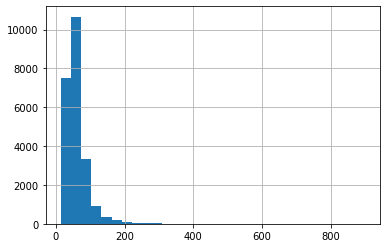

In [68]:
df['total_area'].hist(bins=30);

Построим графики значений цены и количества комнат.

In [69]:
#Удалим объекты площадью больше 300 кв.м.
df = df[df['total_area']<300]

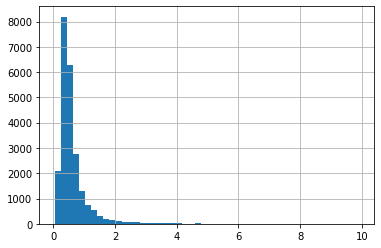

In [70]:
(df[df['last_price']<100_000_000]['last_price']/10_000_000).hist(bins=50);

In [71]:
#Удалим объекты ценой больше 50_000_000 р.
df = df[df['total_area']<50_000_000]

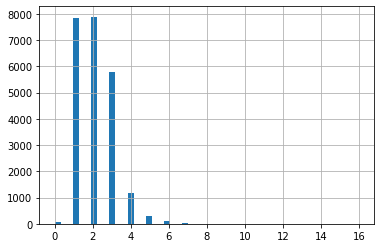

In [72]:
df['rooms'].hist(bins=50);

In [73]:
#Удалим объекты с количеством комнат 8
df = df[df['rooms']<9]

In [74]:
df.shape[0] / df_old_shape[0] * 100

97.76361871808938

Исключено примерно 3% записей

### Посчитаем и добавим в таблицу новые столбцы

In [77]:
#Добавим новые столбцы
#цена одного квадратного метра
df['price_square_meter'] = round(df['last_price']/df['total_area'],2)
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
df['day_of_week'] = df['first_day_exposition'].dt.day_of_week
#месяц публикации объявления
df['month'] = df['first_day_exposition'].dt.month
#год публикации объявления
df['year'] = df['first_day_exposition'].dt.year
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def floor(floor_x,floor_all):
    if floor_x== 1:
        return 'Первый'
    elif floor_all//floor_x == 1 and floor_all%floor_x == 0:
        return 'Последний'
    else:
        return 'Другой'
    
df['type_floor'] = df.apply(lambda x: floor(x.floor,x.floors_total),axis =1)
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest']/1000)

df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week,month,year,type_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.700,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,Другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.600,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,Первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.700,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,Другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.600,14,45.76,9,False,False,False,10.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,Другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.030,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,Другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.700,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,Другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.645,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,Другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.740,24,31.00,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,Другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.615,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,Другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.500,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,Другой,15.0


### Проведем исследовательский анализ данных

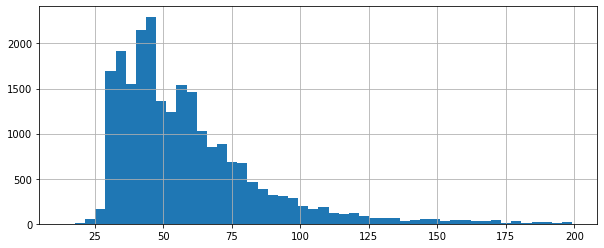

In [78]:
#общая площадь
df[df['total_area']<200]['total_area'].hist(figsize=(10,4),bins = 50);

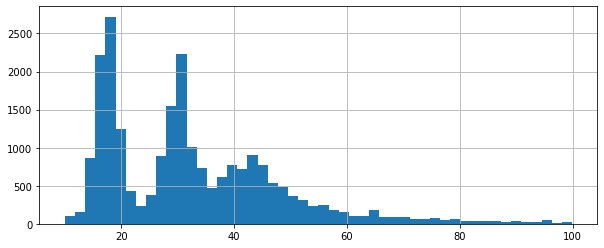

In [79]:
#жилая площадь
df[df['living_area']<100]['living_area'].hist(figsize=(10,4),bins = 50);

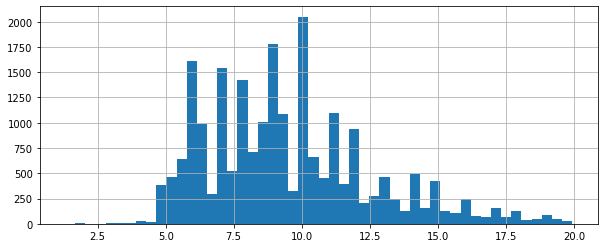

In [80]:
#площадь кухни
df[df['kitchen_area']<20]['kitchen_area'].hist(figsize=(10,4),bins = 50);

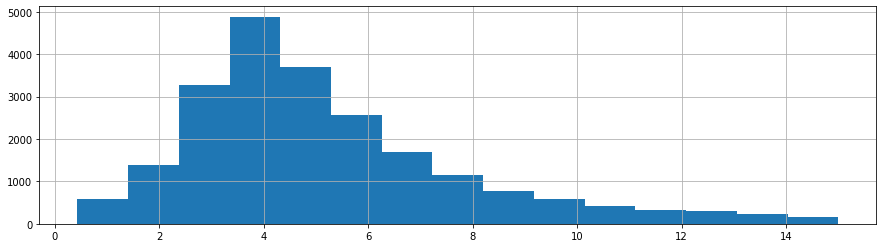

In [81]:
#цена объекта
(df[df['last_price']<15_000_000]['last_price']/1_000_000).hist(figsize=(15,4),bins = 15);

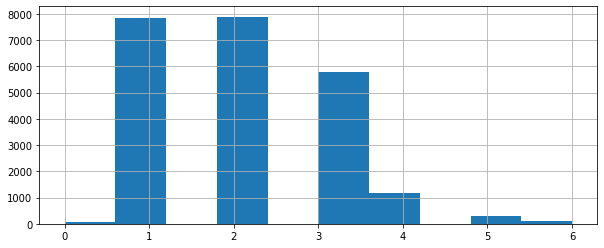

In [82]:
#количество комнат
df[df['rooms']<7]['rooms'].hist(figsize=(10,4));

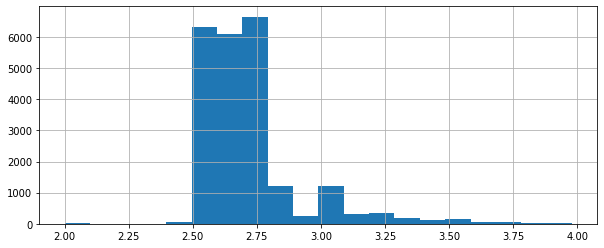

In [83]:
#высота потолков
df[df['ceiling_height']<4]['ceiling_height'].hist(figsize=(10,4),bins = 20);

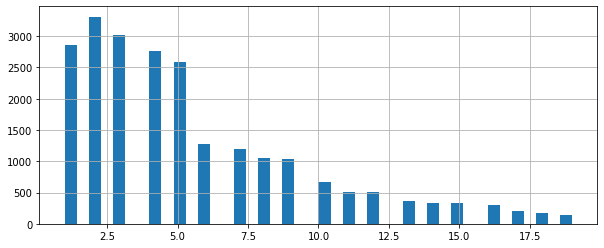

In [84]:
#этаж квартиры
df[df['floor']<20]['floor'].hist(figsize=(10,4),bins = 42);

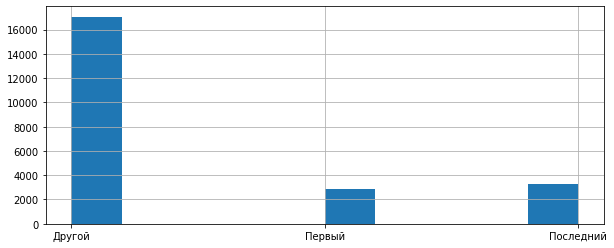

In [85]:
#тип этажа квартиры («первый», «последний», «другой»)
df['type_floor'].hist(figsize=(10,4));

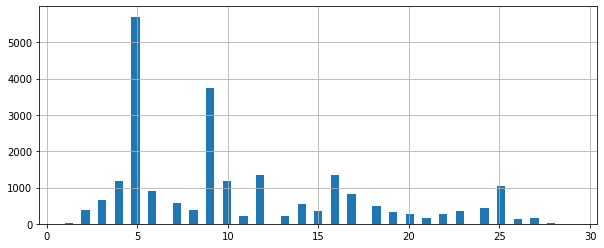

In [86]:
#общее количество этажей в доме
df[df['floors_total']<30]['floors_total'].hist(figsize=(10,4),bins = 61);

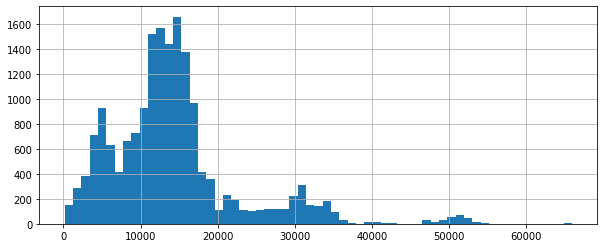

In [87]:
#расстояние до центра города в метрах
df['cityCenters_nearest'].hist(figsize=(10,4),bins = 61);

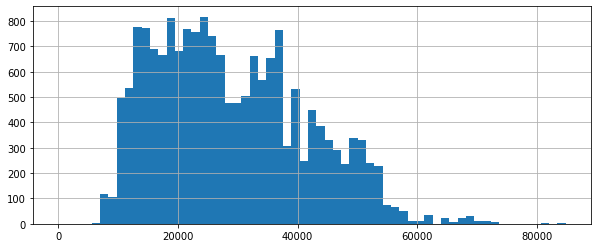

In [88]:
#расстояние до ближайшего аэропорта
df['airports_nearest'].hist(figsize=(10,4),bins = 61);

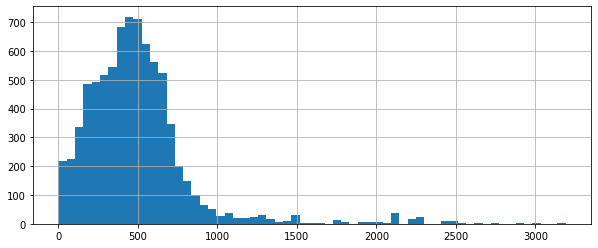

In [89]:
#расстояние до ближайшего парка
df['parks_nearest'].hist(figsize=(10,4),bins = 61);

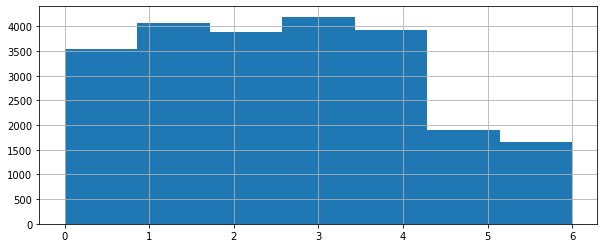

In [90]:
#день и месяц публикации объявления
df['day_of_week'].hist(figsize=(10,4), bins =7);

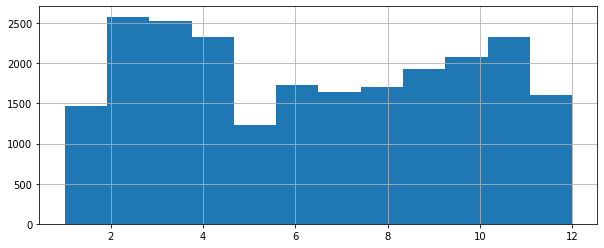

In [91]:
df['month'].hist(figsize=(10,4), bins =12);

##### Выводы
1. Большинство продаваемых объектов имеет общую площадь от 27 до 60 кв.м., при этом существует и предложения значительно превышающие данные значения по площади.
2. Жилая площадь в основном в диапазоне 10-50 кв.м. С тремя выраженными вершинами, скорее соответствующим типовым площадям 1-но, 2-х, 3-х комнатных квартир. Так же существует и предложения значительно превышающие данные значения по площади.
3. Площадь кухни в основном в диапазоне 5-12 кв.м. При этом есть много вершин соостветствующие типовым размерам кухни-которые менялись в зависимости от правил застройки. Так же существует и предложения значительно превышающие данные значения по площади.
4. Общая цена в основном от 1 млн до 10 млн. при этом наибольшее предложение объектов с ценой в районе 4 млн. Есть предложения и значительно дороже.
5. Количество комнат подтверждает наблюдение из п.2 - выставляют в оснвном 1-но, 2-х, 3-х комнатные квартиры.
6. Высота потолков от 2.5 до 2.8 м., что также скорее всего связано со стандартами строительства.
7. Предложения в основном до 9го этажа расположения. Связано скорее всего с только недавним началом строительством высотных домов, да и не везде по области.
8. По типу этажа - лидирует предложение объектов с промежуточным расположением между первым и последним этажом.
9. По общему количеству этажей  выдляются 5и и 9ти этажки. Связано с недавними нормами строительства массового жилья.
10. Расстояние до центра (где указано) в основном до 20 километров.
11. Расстояние до аэропорта(где указано) в основном до 60 километров.
12. Расстояние до парка (где указано) в основном до 1 километра.
13. Объявления размещают в основном по рабочим дням.
14. По месяцам размещения объявлений: наименьшее число декабрь,январь, май - месяцы с наибольшим количеством праздничных дней, либо для декабря-предваряющий Новый год. И после декабря, января с минимальным количеством размещенных оюъявлений идет всплеск в феврале,марте,апреле.

#### Изучим скорость продажи объектов.

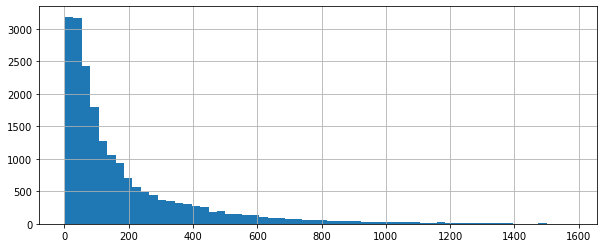

In [92]:
df['days_exposition'].hist(figsize=(10,4), bins =60);

In [93]:
print(df1['days_exposition'].describe(percentiles=[.01,.1,.25,.5,.75,.9,.99]))

count    20097.000000
mean       182.079664
std        220.631479
min          1.000000
1%           4.000000
10%         17.000000
25%         45.000000
50%         97.000000
75%        233.000000
90%        462.400000
99%       1072.080000
max       1580.000000
Name: days_exposition, dtype: float64


Быстрые продажи - продажи в течении 45 дней. Долгие - дольше 233 дней

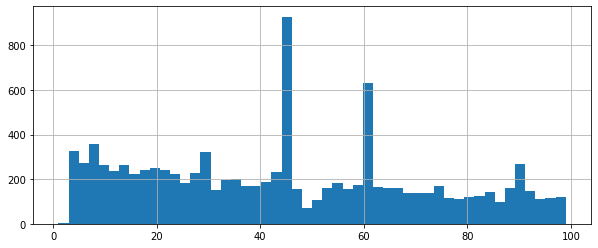

In [94]:
df[df['days_exposition']<100]['days_exposition'].hist(figsize=(10,4), bins =50);

В диапазоне до 100 дней есть два пика в районе 45 и 60 дней. Можно попробовать объснить их - стандартным сроком оформления продажи квартиры с последующим снятием объявления либо достаточным сроком, через которое объявление перевыставляют(1.5-2 месяца).

#### Изучим зависимость цены кв.метра от различных параметров.

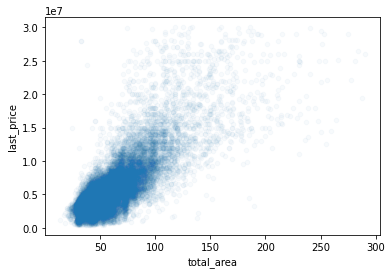

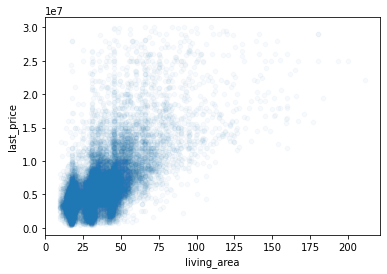

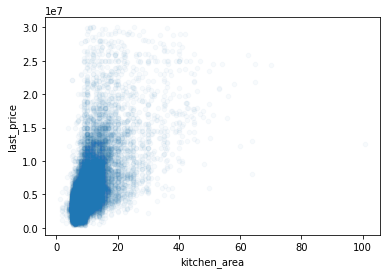

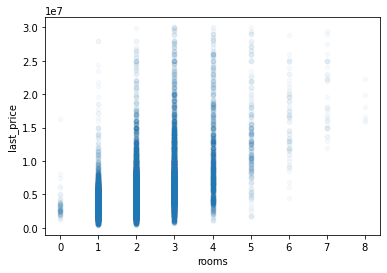

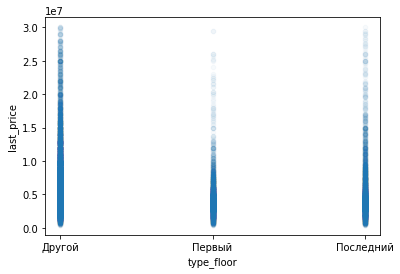

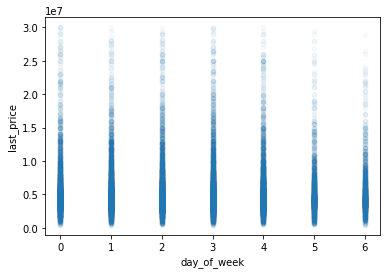

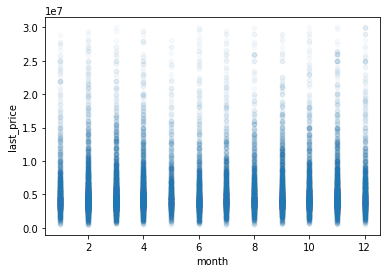

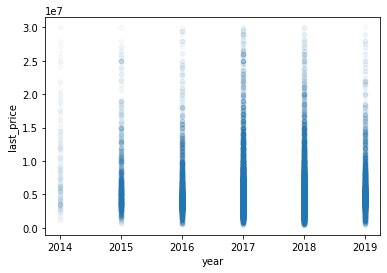

In [95]:
parametr_list = ['total_area','living_area','kitchen_area','rooms','type_floor','day_of_week','month','year']
for i in parametr_list:
    df[df['last_price']<30_000_000].plot(x=i,y='last_price',kind='scatter', subplots=True, alpha=0.03)

С увеличением площадей цена увеличивается, но с учетом большого разброса - на цену влияет не только площади но и другие параметры. Дополнительно рассмотрим другие параметы.

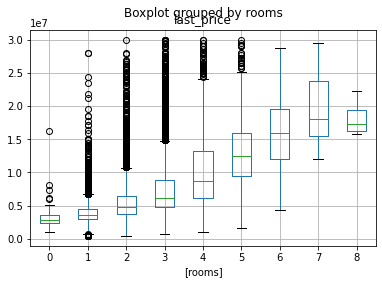

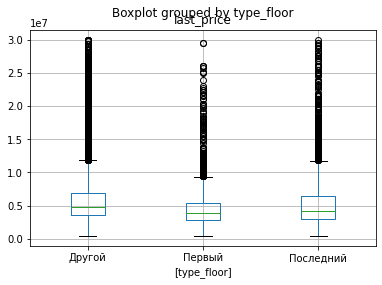

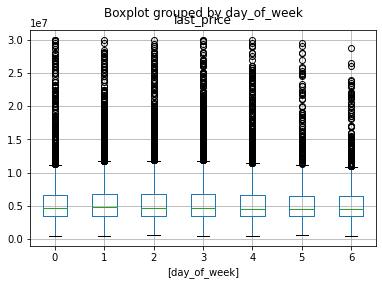

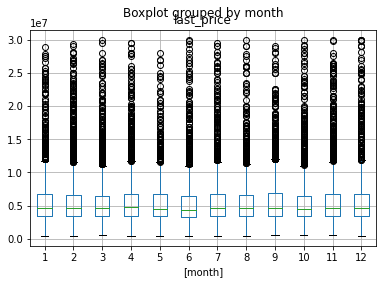

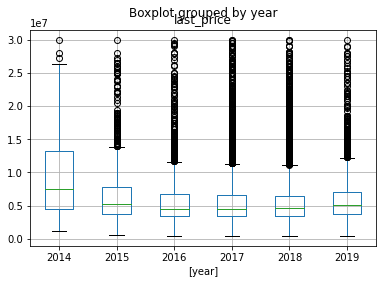

In [96]:
#Построим boxplot для параметров, которые можно отнести к категорийным
parametr_list = ['rooms','type_floor','day_of_week','month','year']
for i in parametr_list:
    df[df['last_price']<30_000_000].boxplot(column =['last_price'],by=[i])

Средняя цена увеличивается с увеличением количества комнат,ниже для квартир на 1м и последнем этаже, не зависит от дня недели и месяца. Также наибольшая средняя цена была в 2014 году.

In [97]:
#рассмотрим коэффициэнты корреляции Пирсона
parametr_list = ['total_area','living_area','kitchen_area','rooms']
for i in parametr_list:
    print(f'Для параметра {i}, коэффициент корреляции:', df['last_price'].corr(df[i]))

Для параметра total_area, коэффициент корреляции: 0.676576405174
Для параметра living_area, коэффициент корреляции: 0.5738882038048012
Для параметра kitchen_area, коэффициент корреляции: 0.5052867856872872
Для параметра rooms, коэффициент корреляции: 0.38976359593931736


Для площадей и числа комнат корреляция есть, но не слишком сильная.

#### Найдем населенные пункты с минимальной и максимальной ср. ценой кв. метра, из 10ти наиболее популярных

In [98]:

data = df[['locality_name','price_square_meter']].groupby('locality_name').agg(['mean','count'])
data.columns = ['mean','count']
data = data.sort_values('count',ascending=False)[0:10]
print('Наибольшая ср. цена кв. метра в:\n' ,data.sort_values('mean',ascending=False)[0:1])
print('Наименьшая ср. цена кв. метра в:\n',data.sort_values('mean')[0:1])

Наибольшая ср. цена кв. метра в:
                           mean  count
locality_name                        
Санкт-Петербург  114214.255655  15378
Наименьшая ср. цена кв. метра в:
                        mean  count
locality_name                     
Выборг         57993.435127    236


Построим барплот для топ10.

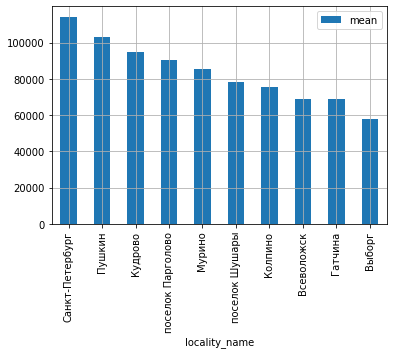

In [99]:
data = data.sort_values('mean',ascending=False)
data.plot(y='mean', kind='bar',grid=True,rot=90);

#### Найдем цену километра расстяния от центра для Санкт-Петербурга

In [100]:
data = df[(df['locality_name'] == 'Санкт-Петербург') & (~df['cityCenters_nearest_km'].isna())][['locality_name','cityCenters_nearest_km','last_price']]
data.groupby('cityCenters_nearest_km').agg({'last_price':['mean','median']})

last_price            
                                mean      median
cityCenters_nearest_km                          
0.0                     3.144912e+07  17900000.0
1.0                     2.096420e+07  11395000.0
2.0                     1.619304e+07  10000000.0
3.0                     1.074450e+07   8418000.0
4.0                     1.195288e+07   9200000.0
5.0                     1.269518e+07   9400000.0
6.0                     1.392144e+07   8818909.5
7.0                     1.438264e+07   7800000.0
8.0                     9.206744e+06   7450000.0
9.0                     7.024501e+06   5400000.0
10.0                    6.435321e+06   5000000.0
11.0                    6.262421e+06   5098000.0
12.0                    5.852769e+06   4990000.0
13.0                    6.129167e+06   5250000.0
14.0                    5.641767e+06   4899000.0
15.0                    5.859116e+06   4900000.0
16.0                    5.395332e+06   4800000.0
17.0                    5.277931e+06   4600000.0
18.0                    5.052725e+06   4320000.0
19.0                    5.098529e+06   4500000.0
20.0                    6.117373e+06   5900000.0
21.0                    5.535300e+06   5300000.0
22.0                    5.422567e+06   4950000.0
23.0                    5.019738e+06   4545000.0
24.0                    3.890687e+06   3610000.0
25.0                    4.229080e+06   4070000.0
26.0                    3.993577e+06   3330000.0
27.0                    8.300000e+06   8300000.0
28.0                    5.026429e+06   4990000.0
29.0                    4.236667e+06   4535000.0

Километраж до центра сильно отражается на средней цене при значении до 10 км. Дальше средние значения примерно одинаковые.

### Общий вывод

После получения данных, произведен их первичный анализ. Определены столбцы с пропущенными значениями, и несоответствием типа данных. По графикам определены столбцы с возможными аномальными значениями.  
При предобработке данных по возможности заполнены пропущенные данные:  
- является ли объект аппартаментом;
- количество балконов;
- количество этажей;
- жилой площади;
- площади кухни;
- высоты потолков.  

Исправлены или удалены аномальные значения:
- высоты потолков;
- жилой площади;
- этажа;
- количества комнат;
- общей ценой.  

Проведена проверка названий поселков. 
Исправлены типы столбцов:  
- количество балконов;
- количество этажей;
- дата.  

Добавлены дополнительные параметры:  
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.  

Проведен исследовательски анализ данных по графикам.  
Изучена скорость продажи объектов, цена за кв.м., цена в зависимости от расстояния до центра.  
Определены из 10 ти самых популярных поселений(исходя из количества объявлений)  - поселение с самой низкой(Выборг) и высокой(Санкт-Петербург) ценой за кв.м.  

Общий вывод:  
Большинство объектов на продажу - типовые, на что указывает площади, этажность, количество комнат.  
Существует зависимость между площадьми и ценой, но на цену влияет множество параметров, поэтому нет сильной корреляции между ценой и одним параметром.  
При этом, судя по данным полученным по расстоянию до центра, для некоторого диапазона(до 10 км.) влияние значительное, а в дальнейшем нивелируется.  
По скорости продаж можно выделить быстрые(до 45 дней) и медленные(дольше 233 дней).  

